In [37]:
"""Exercice 3"""

'Exercice 3'

In [38]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

# Black-Scholes formula for d1 and d2
def calculate_d1_d2(S, K, r, sigma, T):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return d1, d2

# Black-Scholes price for a call option
def call_price(S, K, r, sigma, T):
    d1, d2 = calculate_d1_d2(S, K, r, sigma, T)
    return S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)

# Black-Scholes price for a put option
def put_price(S, K, r, sigma, T):
    d1, d2 = calculate_d1_d2(S, K, r, sigma, T)
    return K * np.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)

# Delta of a call option
def call_delta(S, K, r, sigma, T):
    d1, _ = calculate_d1_d2(S, K, r, sigma, T)
    return norm.cdf(d1)

# Delta of a put option
def put_delta(S, K, r, sigma, T):
    d1, _ = calculate_d1_d2(S, K, r, sigma, T)
    return norm.cdf(d1) - 1

# Gamma for both call and put options
def option_gamma(S, K, r, sigma, T):
    d1, _ = calculate_d1_d2(S, K, r, sigma, T)
    return norm.pdf(d1) / (S * sigma * np.sqrt(T))

# Parameters
S0 = 100  # Spot price
K1 = 97.5  # Strike price of the first call and put
K2 = 103  # Strike price of the second call
T = 28 / 252  # Time to maturity in years
sigma = 0.01 * np.sqrt(252)  # Annualized volatility
r = 0.02 / 365 * 365  # Annualized interest rate

# Quantity of options
q_call_1 = -1.5  # Short 1.5 call options (K=97.5)
q_put_1 = -1     # Short 1 put option (K=97.5)
q_call_2 = 2.5   # Long 2.5 call options (K=103)

# Calculate price, delta, and gamma for each option
price_call_1 = call_price(S0, K1, r, sigma, T)
delta_call_1 = call_delta(S0, K1, r, sigma, T)
gamma_call_1 = option_gamma(S0, K1, r, sigma, T)

price_put_1 = put_price(S0, K1, r, sigma, T)
delta_put_1 = put_delta(S0, K1, r, sigma, T)
gamma_put_1 = option_gamma(S0, K1, r, sigma, T)

price_call_2 = call_price(S0, K2, r, sigma, T)
delta_call_2 = call_delta(S0, K2, r, sigma, T)
gamma_call_2 = option_gamma(S0, K2, r, sigma, T)

# Portfolio price, delta, and gamma (weighted sum)
portfolio_price = q_call_1 * price_call_1 + q_put_1 * price_put_1 + q_call_2 * price_call_2
portfolio_delta = q_call_1 * delta_call_1 + q_put_1 * delta_put_1 + q_call_2 * delta_call_2
portfolio_gamma = q_call_1 * gamma_call_1 + q_put_1 * gamma_put_1 + q_call_2 * gamma_call_2

print(f"Portfolio Price: {portfolio_price}")
print(f"Portfolio Delta: {portfolio_delta}")
print(f"Portfolio Gamma: {portfolio_gamma}")

Portfolio Price: -3.9895500799057615
Portfolio Delta: 0.01057629221764933
Portfolio Gamma: 0.004847806054576714


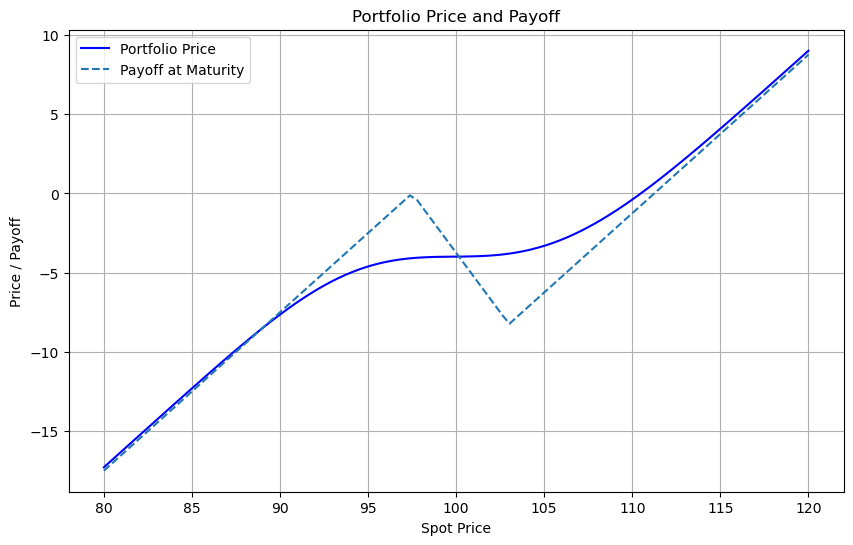

In [39]:
# Range of spot prices for plotting
S_range = np.linspace(80, 120, 100)

# Calculate the price of each option and portfolio for different spot prices
prices_call_1 = [q_call_1 * call_price(s, K1, r, sigma, T) for s in S_range]
prices_put_1 = [q_put_1 * put_price(s, K1, r, sigma, T) for s in S_range]
prices_call_2 = [q_call_2 * call_price(s, K2, r, sigma, T) for s in S_range]

portfolio_prices = [pc1 + pp1 + pc2 for pc1, pp1, pc2 in zip(prices_call_1, prices_put_1, prices_call_2)]
payoff = [q_call_1 * max(s - K1, 0) + q_put_1 * max(K1 - s, 0) + q_call_2 * max(s - K2, 0) for s in S_range]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(S_range, portfolio_prices, label="Portfolio Price", color='blue')
plt.plot(S_range, payoff, label="Payoff at Maturity", linestyle='--')
plt.title("Portfolio Price and Payoff")
plt.xlabel('Spot Price')
plt.ylabel('Price / Payoff')
plt.grid(True)
plt.legend()
plt.show()


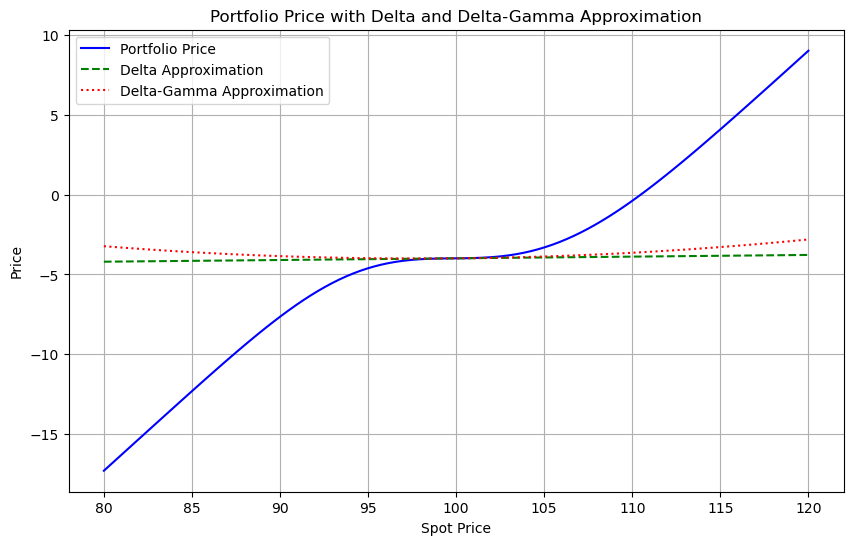

In [40]:
# Linear (Delta) and Quadratic (Delta-Gamma) Approximations
delta_approx = portfolio_price + portfolio_delta * (S_range - S0)
gamma_approx = portfolio_price + portfolio_delta * (S_range - S0) + 0.5 * portfolio_gamma * (S_range - S0) ** 2

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(S_range, portfolio_prices, label="Portfolio Price", color='blue')
plt.plot(S_range, delta_approx, label="Delta Approximation", linestyle='--', color='green')
plt.plot(S_range, gamma_approx, label="Delta-Gamma Approximation", linestyle=':', color='red')
plt.title("Portfolio Price with Delta and Delta-Gamma Approximation")
plt.xlabel('Spot Price')
plt.ylabel('Price')
plt.grid(True)
plt.legend()
plt.show()

In [41]:
Z_alpha = norm.ppf(0.01)  # 99% VaR corresponds to the 1% quantile
T_days = 10 / 252  # 10 days in terms of years

# VaR based on Delta
VaR_delta = -portfolio_delta * S0 * sigma * np.sqrt(T_days) * Z_alpha

# VaR based on Delta-Gamma
VaR_delta_gamma = (-portfolio_delta * S0 * sigma * np.sqrt(T_days) * Z_alpha -
                   0.5 * portfolio_gamma * (S0 * sigma * np.sqrt(T_days)*Z_alpha) ** 2)

print(f"VaR (Delta): {VaR_delta}")
print(f"VaR (Delta-Gamma): {VaR_delta_gamma}")

VaR (Delta): 0.0778051061918868
VaR (Delta-Gamma): -0.05337396675608935


In [42]:
n_simulations = 10000
simulated_returns = np.random.normal(0, sigma * np.sqrt(T_days), n_simulations)
simulated_prices = S0 * np.exp(simulated_returns)

# Calculate the portfolio price for each simulated price
simulated_portfolio_prices = [
    q_call_1 * call_price(s, K1, r, sigma, T) +
    q_put_1 * put_price(s, K1, r, sigma, T) +
    q_call_2 * call_price(s, K2, r, sigma, T)
    for s in simulated_prices
]

# Sort the portfolio prices and calculate the VaR as the 1st percentile (99% VaR)
simulated_portfolio_prices = np.sort(simulated_portfolio_prices)
VaR_mc = portfolio_price - simulated_portfolio_prices[int(0.01 * n_simulations)]

print(f"VaR (Monte Carlo Simulation): {VaR_mc}")

VaR (Monte Carlo Simulation): 1.6292013534561267


we can conclude that this position has nearly no greaks, and no VAR so no Risk. But Risk is not local but global. So at a particular point of time it seems that there is no risk as no greeks but the Monte Carlo VAr at 1.54 has risks. Looking at the graph we are at a specific shift in convexity.